# 數據預處理

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_train=pd.read_csv('Horse.csv')
data_train.columns

Index(['年齡', '場次', '排名', '比賽日期', '賽道', '距離', '場地狀況', '班次',
       '檔位', '評分', '訓練師', '騎師', '獨贏勝率', '負磅', '體重'],
      dtype='object')

In [44]:
data_train.head()

,年齡,場次,排名,比賽日期,賽道,距離,場地狀況,班次,檔位,評分,訓練師,騎師,獨贏勝率,負磅,體重
0,6,562,11,08/04/20,"跑馬地草地""B""",1000,好,2,7,94,鄭俊偉,陳嘉熙,74.0,124,1112
1,6,481,13,08/03/20,"沙田草地""C""",1000,好,2,6,94,鄭俊偉,陳嘉熙,30.0,124,1115
2,6,407,4,08/02/20,"沙田草地""C+3""",1200,好,2,4,93,鄭俊偉,陳嘉熙,242.0,113,1124
3,6,350,11,19/01/20,"沙田草地""A+3""",1200,好,2,3,95,鄭俊偉,郭能,259.0,128,1131
4,6,299,9,01/01/20,"沙田草地""C""",1000,好,2,7,97,鄭俊偉,郭能,82.0,130,1117


## 查看有無缺失值

In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10323 entries, 0 to 10322
Data columns (total 15 columns):
年齡      10323 non-null int64
場次      10323 non-null int64
排名      10323 non-null object
比賽日期    10323 non-null object
賽道      10323 non-null object
距離      10323 non-null int64
場地狀況    10323 non-null object
班次      10323 non-null object
檔位      10323 non-null int64
評分      10323 non-null int64
訓練師     10323 non-null object
騎師      10323 non-null object
獨贏勝率    10323 non-null float64
負磅      10323 non-null int64
體重      10323 non-null int64
dtypes: float64(1), int64(7), object(7)
memory usage: 1.2+ MB


### 將排名轉成 int類型 / 前三名 代表1,其他名次 代表0

In [46]:
data_train['排名']=data_train['排名'].replace({'4':'0','5':'0','6':'0','7':'0','8':'0','9':'0','10':'0','11':'0','12':'0','13':'0','14':'0','DISQ':'0','UR':'0'})
data_train['排名']=data_train['排名'].replace({'1':'1','2':'1','3':'1'})

data_train['排名']=data_train['排名'].convert_objects(convert_numeric=True)

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10323 entries, 0 to 10322
Data columns (total 15 columns):
年齡      10323 non-null int64
場次      10323 non-null int64
排名      10323 non-null int64
比賽日期    10323 non-null object
賽道      10323 non-null object
距離      10323 non-null int64
場地狀況    10323 non-null object
班次      10323 non-null object
檔位      10323 non-null int64
評分      10323 non-null int64
訓練師     10323 non-null object
騎師      10323 non-null object
獨贏勝率    10323 non-null float64
負磅      10323 non-null int64
體重      10323 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 1.2+ MB


/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


# 數據描述分析

In [47]:
data_train.describe()

,年齡,場次,排名,距離,檔位,評分,獨贏勝率,負磅,體重
count,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000
mean,5.523297,392.480965,0.274533,1397.830088,6.807130,62.344764,39.044483,123.552456,1113.333721
std,1.317138,215.682549,0.446300,269.724934,3.719102,17.707707,65.285851,5.861463,63.607936
min,3.000000,1.000000,0.000000,1000.000000,1.000000,11.000000,1.000000,105.000000,933.000000
25%,5.000000,214.500000,0.000000,1200.000000,4.000000,50.000000,6.700000,119.000000,1067.000000
50%,5.000000,397.000000,0.000000,1400.000000,7.000000,60.000000,14.000000,124.000000,1110.000000
75%,6.000000,557.000000,1.000000,1650.000000,10.000000,72.000000,38.000000,128.000000,1155.000000
max,9.000000,817.000000,1.000000,2400.000000,14.000000,138.000000,674.000000,133.000000,1337.000000


從mean的數據中，可以了解馬匹進入前三名的機率為27%，平均年齡為5.5歲

# 透過可視化了解數據

## 馬匹年齡數量分布

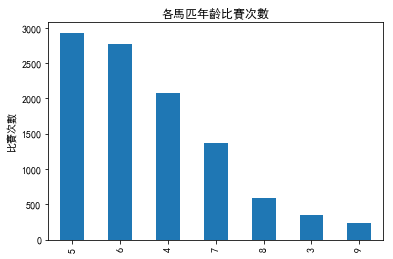

,各馬匹年齡比賽次數
5,2931
6,2769
4,2083
7,1365
8,590
3,354
9,231


In [48]:
plt.rcParams['font.sans-serif'] = ['simhei'] 
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure()
fig.set(alpha=0.2) 

dis = data_train.年齡.value_counts().sort_values(ascending=False)
dis.plot(kind='bar')
plt.title("各馬匹年齡比賽次數")
plt.ylabel('比賽次數')
plt.show()

df = pd.DataFrame({'各馬匹年齡比賽次數': dis})
df

## 馬匹班次等級分布

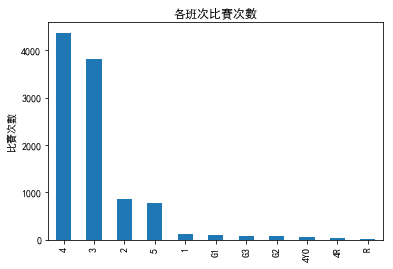

,各班次比賽次數
4,4374
3,3825
2,864
5,771
1,112
G1,96
G3,87
G2,74
4YO,64
4R,44


In [49]:
fig = plt.figure()
fig.set(alpha=0.2) 

dis = data_train.班次.value_counts().sort_values(ascending=False)
dis.plot(kind='bar')
plt.title("各班次比賽次數")
plt.ylabel('比賽次數')
plt.show()

df = pd.DataFrame({'各班次比賽次數': dis})
df

#### 班次等級之分 由高到低
G1 - G2 - G3 - 1 - 2 - 3 - 4 -5 - 4YO - R - 4R (R:後備馬匹)

## 各班次的馬匹年齡分布

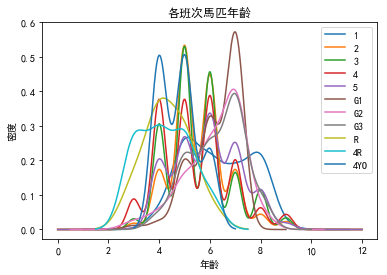

In [50]:
data_train.年齡[data_train.班次 == '1'].plot(kind='kde')   
data_train.年齡[data_train.班次 == '2'].plot(kind='kde')
data_train.年齡[data_train.班次 == '3'].plot(kind='kde')
data_train.年齡[data_train.班次 == '4'].plot(kind='kde')   
data_train.年齡[data_train.班次 == '5'].plot(kind='kde')
data_train.年齡[data_train.班次 == 'G1'].plot(kind='kde')
data_train.年齡[data_train.班次 == 'G2'].plot(kind='kde')   
data_train.年齡[data_train.班次 == 'G3'].plot(kind='kde')
data_train.年齡[data_train.班次 == 'R'].plot(kind='kde')
data_train.年齡[data_train.班次 == '4R'].plot(kind='kde')   
data_train.年齡[data_train.班次 == '4YO'].plot(kind='kde')

plt.xlabel("年齡")
plt.ylabel("密度") 
plt.title("各班次馬匹年齡")
plt.legend(('1', '2','3','4','5','G1','G2','G3','R','4R','4YO')) 
plt.show()

## 各種賽道距離比賽次數

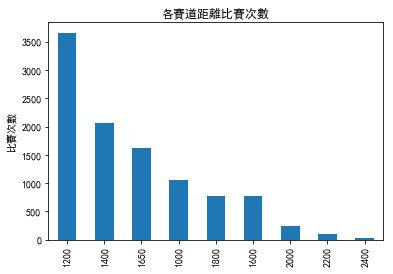

,各賽道距離比賽次數
1200,3657
1400,2061
1650,1628
1000,1049
1800,781
1600,775
2000,240
2200,109
2400,23


In [51]:
fig = plt.figure()
fig.set(alpha=0.2) 

dis = data_train.距離.value_counts().sort_values(ascending=False)
dis.plot(kind='bar')
plt.title("各賽道距離比賽次數")
plt.ylabel('比賽次數')
plt.show()

df = pd.DataFrame({'各賽道距離比賽次數': dis})
df

## 各訓練師比賽次數

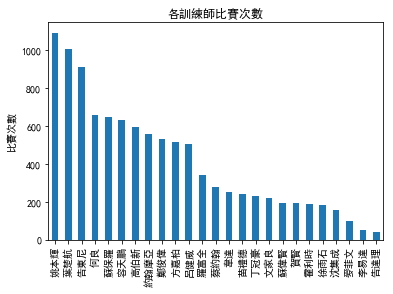

,各訓練師比賽次數
姚本輝,1091
葉楚航,1005
告東尼,912
何良,660
蘇保羅,646
容天鵬,633
高伯新,593
約翰摩亞,559
鄭俊偉,532
方嘉柏,516


In [52]:
fig = plt.figure()
fig.set(alpha=0.2) 

dis = data_train.訓練師.value_counts().sort_values(ascending=False)
dis.plot(kind='bar')
plt.title("各訓練師比賽次數")
plt.ylabel('比賽次數')
plt.show()

df = pd.DataFrame({'各訓練師比賽次數': dis})
df

## 各騎師比賽次數

#### 因為騎師人數眾多，只顯示前30名的騎師與比賽次數

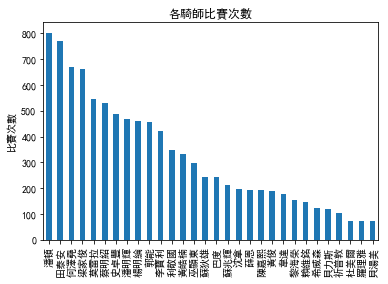

,各騎師比賽次數
潘頓,802
田泰安,769
何澤堯,671
梁家俊,663
莫雷拉,545
蔡明紹,528
史卓豐,487
潘明輝,469
楊明綸,462
郭能,456


In [53]:
fig = plt.figure()
fig.set(alpha=0.2) 

dis = data_train.騎師.value_counts().head(30).sort_values(ascending=False)
dis.plot(kind='bar')
plt.title("各騎師比賽次數")
plt.ylabel('比賽次數')
plt.show()

df = pd.DataFrame({'各騎師比賽次數': dis})
df

### 從各圖表中可以了解到:
* 賽馬的歲數主要是在4至6歲
* 馬匹幾乎集中在班次3與4的級別之中，且要升級進入更高級別的班次極為困難
* 各班次馬匹年齡與年齡總體分布趨於一致，但可以發現更高級別的馬匹年齡落在7歲最多
* 賽道距離主要集中在1200公尺
* 姚本輝,葉楚航,告東尼，三位訓練師所訓練的馬匹出場次數遠遠大於其他訓練師
* 騎師的出場次數差距極大，第1名與第30名已有10倍的差距




# 屬性與獲勝情況的可視化



## 各馬匹年齡與獲勝情況

<Figure size 432x288 with 0 Axes>

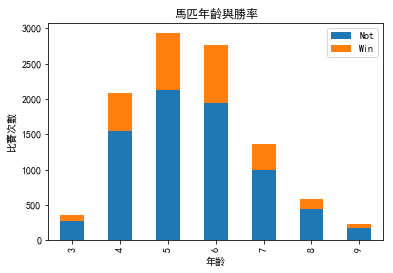

,Not,Win,總比賽次數,勝率
3,276,78,354,22.03
4,1540,543,2083,26.07
5,2121,810,2931,27.64
6,1943,826,2769,29.83
7,997,368,1365,26.96
8,444,146,590,24.75
9,168,63,231,27.27


In [54]:
fig = plt.figure()
fig.set(alpha=0.2) 

Win_0 = data_train.年齡[data_train.排名 == 0].value_counts()
Win_1 = data_train.年齡[data_train.排名 == 1].value_counts()

df=pd.DataFrame({'Win':Win_1, 'Not':Win_0})

df.plot(kind='bar',stacked=True)
plt.title("馬匹年齡與勝率")
plt.xlabel("年齡") 
plt.ylabel("比賽次數") 
plt.legend()
plt.show()

df['總比賽次數'] = df['Win'] + df['Not']
df['勝率'] = (df['Win'] / df['總比賽次數'])*100
df.style.format('{:.2f}', subset='勝率').background_gradient('Blues',subset="勝率")

#### 顏色越深，勝率越高




## 各檔位與獲勝情況

####  第1檔位為最內側 由內往外排序 第14檔位為最外側

<Figure size 432x288 with 0 Axes>

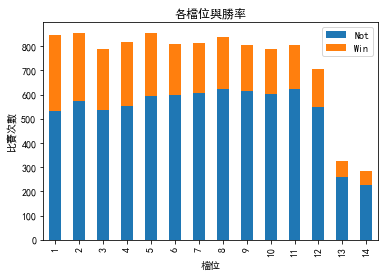

,Not,Win,總比賽次數,勝率
1,534,312,846,36.88
2,575,280,855,32.75
3,535,252,787,32.02
4,554,263,817,32.19
5,593,259,852,30.40
6,597,213,810,26.30
7,608,203,811,25.03
8,622,216,838,25.78
9,615,190,805,23.60
10,601,185,786,23.54


In [55]:
fig = plt.figure()
fig.set(alpha=0.2)  

Win_0 = data_train.檔位[data_train.排名 == 0].value_counts()
Win_1 = data_train.檔位[data_train.排名 == 1].value_counts()

df=pd.DataFrame({'Win':Win_1, 'Not':Win_0})

df.plot(kind='bar',stacked=True)
plt.title("各檔位與勝率")
plt.xlabel("檔位") 
plt.ylabel("比賽次數") 
plt.legend()
plt.show()

df['總比賽次數'] = df['Win'] + df['Not']
df['勝率'] = (df['Win'] / df['總比賽次數'])*100
df.style.format('{:.2f}', subset='勝率').background_gradient('Blues',subset="勝率")

#### 顏色越深，勝率越高

#### 因有中途退賽等突發狀況，所以總比賽次數會不同，大部分比賽為12匹馬，少數比賽才有14匹


## 各訓練師與獲勝情況

<Figure size 432x288 with 0 Axes>

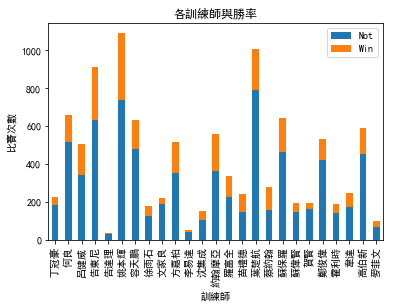

,Not,Win,總比賽次數,勝率
丁冠豪,188,41,229,17.90
何良,520,140,660,21.21
呂健威,342,163,505,32.28
告東尼,633,279,912,30.59
告達理,33,6,39,15.38
姚本輝,741,350,1091,32.08
容天鵬,478,155,633,24.49
徐雨石,130,51,181,28.18
文家良,189,33,222,14.86
方嘉柏,355,161,516,31.20


In [56]:
fig = plt.figure()
fig.set(alpha=0.2) 

Win_0 = data_train.訓練師[data_train.排名 == 0].value_counts()
Win_1 = data_train.訓練師[data_train.排名 == 1].value_counts()

df=pd.DataFrame({'Win':Win_1, 'Not':Win_0})

df.plot(kind='bar',stacked=True)
plt.title("各訓練師與勝率")
plt.xlabel("訓練師") 
plt.ylabel("比賽次數") 
plt.legend()
plt.show()

df['總比賽次數'] = df['Win'] + df['Not']
df['勝率'] = (df['Win'] / df['總比賽次數'])*100
df.style.format('{:.2f}', subset='勝率').background_gradient('Blues',subset="勝率")

#### 顏色越深，勝率越高


## 各騎師與獲勝情況

<Figure size 432x288 with 0 Axes>

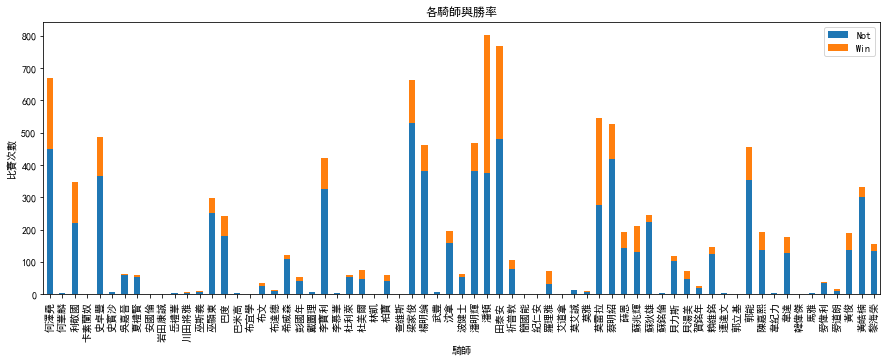

,Not,Win,總比賽次數,勝率
何澤堯,449,222,671,33.08
何華麟,2,1,3,33.33
利敬國,221,126,347,36.31
卡素蘭奴,0,1,1,100.00
史卓豐,365,122,487,25.05
史賓沙,6,1,7,14.29
吳嘉晉,60,2,62,3.23
夏禮賢,54,6,60,10.00
安國倫,0,1,1,100.00
岩田康誠,0,1,1,100.00


In [57]:
fig = plt.figure()
fig.set(alpha=0.2) 

Win_0 = data_train.騎師[data_train.排名 == 0].value_counts()
Win_1 = data_train.騎師[data_train.排名 == 1].value_counts()

df=pd.DataFrame({'Win':Win_1, 'Not':Win_0})

# 將nan值轉為0
df=df.fillna(0)

df.plot(kind='bar',stacked=True,figsize=(15,5))
plt.title("各騎師與勝率")
plt.xlabel("騎師") 
plt.ylabel("比賽次數") 
plt.legend()
plt.show()

# 顯示全部數據
pd.set_option('display.max_rows', None) 

df['總比賽次數'] = df['Win'] + df['Not']
df['勝率'] = (df['Win'] / df['總比賽次數'])*100
df.style.format('{:.2f}', subset='勝率').background_gradient('Blues',subset="勝率")

#### 顏色越深，勝率越高

#### 主要觀察出賽場次500場以上的騎師，共6位

## 各訓練師配各騎師的獲勝情況


/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


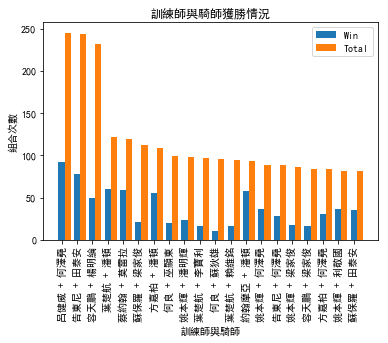

,組合比賽次數,組合獲勝次數,勝率
呂健威 + 何澤堯,245,92,37.55
告東尼 + 田泰安,244,78,31.97
容天鵬 + 楊明綸,232,50,21.55
葉楚航 + 潘頓,122,60,49.18
蔡約翰 + 莫雷拉,119,59,49.58
蘇保羅 + 梁家俊,112,21,18.75
方嘉柏 + 潘頓,109,55,50.46
何良 + 巫顯東,99,20,20.20
姚本輝 + 潘明輝,98,23,23.47
葉楚航 + 李寶利,97,16,16.49


In [58]:
# 訓練師與騎師合併
data_train['tj'] = data_train['訓練師'] + " + " + data_train['騎師']

# 訓練師與騎師的獲勝狀況
fig = plt.figure()
fig.set(alpha=0.2)

rank1 = data_train.tj[data_train.排名 == 1].value_counts().sort_values(ascending=False).head(20)
total = data_train.tj.value_counts().head(20)

df = pd.DataFrame({'amount':total})

am = []
for i in df.index:
    a = data_train.groupby('tj').get_group(i)
    t_rank = a[data_train.排名 == 1].count()
    am.append(t_rank.排名)

df = pd.DataFrame({'組合比賽次數':total, '組合獲勝次數':am})

# 設定每個長條寬度
width = 0.4
plt.bar([i - width/2 for i in range(len(df))], df.組合獲勝次數, label='Win', width = 0.4)
plt.bar([i + width/2 for i in range(len(df))], df.組合比賽次數, label='Total', width = 0.4)

plt.title('訓練師與騎師獲勝情況')
plt.xlabel('訓練師與騎師')
x = [i - width/2 for i in range(len(df))]
plt.xticks(x, df.index, rotation=90)
plt.ylabel("組合次數")
plt.legend()
plt.show()

df['勝率'] = (df['組合獲勝次數'] / df['組合比賽次數'])*100
df.style.format('{:.2f}', subset='勝率').background_gradient('Blues',subset="勝率")

#### 顏色越深，勝率越高

### 由圖表中可以得知:
* 馬匹年齡主要集中在4至7歲的獲勝機會較高，同年齡分布
* 檔位越接近內側，獲勝機會較大
* 各訓練師對獲勝的影響力並無明顯差異，勝率都落在20%至34%之間
* 各騎師對獲勝的影響力較為明顯，有的騎師勝率50%以上而有的只有20%
* 組合次數100次以上的有7組，各訓練師與騎師組合對勝率也有明顯的差異，從50%至20%

# 機器學習

#### 主觀認為年齡與檔位對勝率影響較大
#### 使用年齡與檔位屬性，生成基本模型，查看準確度

In [60]:
import pandas as pd
from IPython.display import display
import sklearn.preprocessing as sp
from sklearn.preprocessing import StandardScaler
from numpy.testing import assert_almost_equal
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np 
import sklearn.ensemble as se
import sklearn.tree as st
import sklearn.metrics as sm
import sklearn.model_selection as ms
import seaborn as sns

# 將資料區分為訓練集（80%）及測試集 (20%)
train_size = int(len(data_train) * 0.8)
data_train = data_train[:train_size]
data_test = data_train[train_size:]

X = data_train.drop(["排名"], axis=1)
Y = data_train["排名"]

base = ["年齡", "檔位"]

# 隨機森林
base_model = se.RandomForestClassifier(random_state=2,n_estimators=300, min_samples_split=30, oob_score=True)
base_model.fit(X[base], Y)
print("Base oob score:%.5f" %(base_model.oob_score_))

Base oob score:0.71662


## 查看特徵重要性

#### 有個別測試過訓練師與騎師的屬性重要性，發現訓練師+騎師效果較好，在編碼中就不再顯示測試過程

In [141]:
# pandas 表格對齊
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

data_train=pd.read_csv('Horse.csv')

data_train0=data_train

# tj = 訓練師+騎師(合併為一個屬性)
data_train['tj'] = data_train['訓練師']+"+"+data_train['騎師']

# 將排名換到第一位置
data_train0.insert(0,'排名1',data_train0.排名)
data_train1=data_train0.drop(['排名','場次','比賽日期','場地狀況','訓練師','騎師'],axis=1)

# 文字轉編碼
label_sd=sp.LabelEncoder()
label_c=sp.LabelEncoder()
label_tj=sp.LabelEncoder()

data_train1['賽道']=label_sd.fit_transform(data_train1['賽道'])
data_train1['班次']=label_c.fit_transform(data_train1['班次'])
data_train1['tj']=label_tj.fit_transform(data_train1['tj'])

print(data_train1.head())

# 顯示各特徵的平均與標準差
data_train_stats=data_train1.describe().loc[['mean','std']]

data_train_stats.style.format("{:.2f}")

  排名1  年齡  賽道  距離  班次  檔位  評分  獨贏勝率  負磅  體重   tj
0    11     6     8  1000     1     7    94      74.0   124  1112  657
1    13     6     5  1000     1     6    94      30.0   124  1115  657
2     4     6     6  1200     1     4    93     242.0   113  1124  657
3    11     6     2  1200     1     3    95     259.0   128  1131  656
4     9     6     5  1000     1     7    97      82.0   130  1117  656


,年齡,賽道,距離,班次,檔位,評分,獨贏勝率,負磅,體重,tj
mean,5.52,4.83,1397.83,2.80,6.81,62.34,39.04,123.55,1113.33,356.69
std,1.32,3.24,269.72,1.47,3.72,17.71,65.29,5.86,63.61,222.74


### 正規化

In [142]:
# 將類型以外的特徵全取出
X = data_train1.iloc[:, 1:]  

# 使用 scikit-learn 內建的 API 正規化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)  # 注意維度

# 手動正規化當然也能得到跟 scikit-learn API 相同的結果
Z = (X - X.mean(axis=0)) / X.std(axis=0, ddof=0)
assert_almost_equal(Z, Z_sk)

# 更新DataFrame
data_train1.iloc[:, 1:] = Z

# 正規化後數據
print(data_train1.head())

data_train_stats = data_train1.describe().loc[['mean', 'std']]

# 各特徵平均與標準差
data_train_stats.style.format("{:.2f}")

  排名1      年齡     賽道      距離      班次      檔位      評分  獨贏勝率  \
0    11  0.361941  0.97935 -1.475019 -1.227988  0.051862  1.787740  0.535448   
1    13  0.361941  0.05340 -1.475019 -1.227988 -0.217033  1.787740 -0.138543   
2     4  0.361941  0.36205 -0.733487 -1.227988 -0.754824  1.731264  3.108872   
3    11  0.361941 -0.87255 -0.733487 -1.227988 -1.023719  1.844215  3.369278   
4     9  0.361941  0.05340 -1.475019 -1.227988  0.051862  1.957166  0.657992   

       負磅      體重        tj  
0  0.076357 -0.020969  1.348333  
1  0.076357  0.026197  1.348333  
2 -1.800398  0.167696  1.348333  
3  0.758814  0.277750  1.343843  
4  1.100042  0.057641  1.343843  


,年齡,賽道,距離,班次,檔位,評分,獨贏勝率,負磅,體重,tj
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### 查看那些特徵較重要

In [110]:
# 只要最大的兩個主成分
# scikit-learn 會自動依照eigenvalue的大小排序共變異數矩陣的eigenvectors
n_components = 2
random_state = 9527

pca = PCA(n_components=n_components,random_state=random_state)

# 正規化後的特徵Z做PCA
L = pca.fit_transform(Z)  

# 顏色越突出代表越重要
pcs = np.array(pca.components_) 

df_pc = pd.DataFrame(pcs, columns=data_train1.columns[1:])
df_pc.index = ["第{%s}主成分"%c for c in['一', '二']]

df_pc.style.format('{:.2f}').background_gradient('Blues')

,年齡,賽道,距離,班次,檔位,評分,獨贏勝率,負磅,體重,tj
第{一}主成分,-0.43,-0.01,-0.48,-0.37,0.25,-0.17,0.51,-0.30,0.00,-0.04
第{二}主成分,0.15,0.34,0.08,0.36,-0.01,-0.72,0.05,-0.30,-0.31,0.13


#### 第一主成分: 檔位與獨贏勝率分數最高             
#### 第二主成分: 年齡、賽道、班次與tj

## 測試屬性重要性
#### 分訓練集及測試集，將排名設為Y，其餘的屬性資料為X

In [114]:
train_size = int(len(data_train1) * 0.8)
data_train0 = data_train1[:train_size]
data_test = data_train1[train_size:]

X = data_train.drop(["排名1"], axis=1)
Y = data_train["排名1"]

# b1:第一主成分   b2:第二主成分
b1,b2=['檔位','獨贏勝率'],['年齡','賽道','班次','tj']

b1_model=se.RandomForestClassifier(max_depth=200,random_state=2,n_estimators=300, min_samples_split=30,oob_score=True)
b1_model.fit(X[b1],Y)

b2_model=se.RandomForestClassifier(max_depth=200,random_state=2,n_estimators=300, min_samples_split=30,oob_score=True)
b2_model.fit(X[b2],Y)

print('b1 oob score: %.5f' %(b1_model.oob_score_))
print('b2 oob score: %.5f' %(b2_model.oob_score_))

b1 oob score: 0.75553
b2 oob score: 0.71829


#### 第一主成分所得出的數值較高 (檔位 + 獨贏勝率)

## 機器學習測試

In [135]:
data_train9=pd.read_csv('Horse.csv')

#將前三名 改為1 其他名次 為0
data_train9['排名']=data_train9['排名'].replace({'4':'0','5':'0','6':'0','7':'0','8':'0','9':'0','10':'0','11':'0','12':'0','13':'0','14':'0','DISQ':'0','UR':'0'})
data_train9['排名']=data_train9['排名'].replace({'1':'1','2':'1','3':'1'})
data_train9['排名']=data_train9['排名'].convert_objects(convert_numeric=True)

#合併訓練師與騎師
data_train9['tj'] = data_train9['訓練師']+"+"+data_train9['騎師']

# 編碼
label_sd=sp.LabelEncoder()
label_km=sp.LabelEncoder()
label_c=sp.LabelEncoder()
label_p=sp.LabelEncoder()
label_w=sp.LabelEncoder()
label_fb=sp.LabelEncoder()
label_tj=sp.LabelEncoder()
label_h=sp.LabelEncoder()

data_train9['賽道']=label_sd.fit_transform(data_train9['賽道'])
data_train9['距離']=label_km.fit_transform(data_train9['距離'])
data_train9['班次']=label_c.fit_transform(data_train9['班次'])
data_train9['評分']=label_p.fit_transform(data_train9['評分'])
data_train9['獨贏勝率']=label_w.fit_transform(data_train9['獨贏勝率']) 
data_train9['負磅']=label_fb.fit_transform(data_train9['負磅'])
data_train9['tj']=label_tj.fit_transform(data_train9['tj'])
data_train9['體重']=label_h.fit_transform(data_train9['體重'])

data_train9=data_train9.drop(['場次','比賽日期','場地狀況','訓練師','騎師'],axis=1)

data_train9.head()

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,年齡,排名,賽道,距離,班次,檔位,評分,獨贏勝率,負磅,體重,tj
0,6,0,8,0,1,7,82,154,19,160,657
1,6,0,5,0,1,6,82,110,19,163,657
2,6,0,6,1,1,4,81,318,8,172,657
3,6,0,2,1,1,3,83,333,23,179,656
4,6,0,5,0,1,7,85,162,25,165,656


In [138]:
#劃分 訓練 測試
train_size = int(len(data_train9) * 0.8)
data_train3 = data_train9[:train_size]
data_test = data_train9[train_size:]

X = data_train3.drop(["排名"], axis=1)
Y = data_train3["排名"]

# b9:基本模型  b8:第一主成分  b7:第二主成分
b9,b8,b7=['年齡','檔位'],['檔位','獨贏勝率'],['年齡','賽道','班次','tj']

b9_model=se.RandomForestClassifier(max_depth=200,random_state=2,n_estimators=300, min_samples_split=30,oob_score=True)
b9_model.fit(X[b9],Y)

b8_model=se.RandomForestClassifier(max_depth=200,random_state=2,n_estimators=300, min_samples_split=30,oob_score=True)
b8_model.fit(X[b8],Y)

b7_model=se.RandomForestClassifier(max_depth=200,random_state=2,n_estimators=300, min_samples_split=30,oob_score=True)
b7_model.fit(X[b7],Y)

print('b9 oob score: %.5f' %(b9_model.oob_score_))
print('b8 oob score: %.5f' %(b8_model.oob_score_))
print('b7 oob score: %.5f' %(b7_model.oob_score_))

b9 oob score: 0.72306
b8 oob score: 0.75975
b7 oob score: 0.72645


#### 第一主成分 b8 所得出的數值高於其他組合
#### 嘗試各種不同的搭配組合，其數值都無法高於b8，編碼中就不顯示搭配與測試過程

## 出題驗證測試

In [146]:
# 排序: 年齡,排名,賽道,距離,班次,檔位,評分,獨贏勝率,負磅,tj
test = [
[6,0,'沙田草地"C"',1000,'2',7,97,82,130,'鄭俊偉+郭能'],
[5,1,'沙田草地"C+3"',1400,'3',1,80,5.5,133,'蔡約翰+蘇兆輝'],
[9,0,'沙田全天候',1650,'3',6,68,4.4,123,'葉楚航+史卓豐'],
[7,0,'沙田草地"A+3"',1400,'3',12,78,35,128,'丁冠豪+黃皓楠'],
[5,1,'跑馬地草地"B"',1200,'4',12,46,2.4,120,'韋達+莫雷拉'],
[6,1,'跑馬地草地"B"',1800,'4',12,60,63,131,'葉楚航+潘明輝'],
[6,1,'沙田草地"A+3"',1200,'4',5,45,2.1,119,'葉楚航+莫雷拉'],
[5,1,'沙田全天候',1200,'3',1,67,2.3,110,'羅富全+陳嘉熙'],
[6,1,'跑馬地草地"C"',1650,'3',1,66,6.4,121,'蔡約翰+莫雷拉'],
[6,0,'跑馬地草地"C+3"',1200,'3',2,77,3.5,133,'容天鵬+蔡明紹'],
[4,0,'跑馬地草地"C"',1200,'3',3,71,8.2,124,'告東尼+田泰安'],
[4,1,'跑馬地草地"C+3"',1650,'5',8,40,29,133,'姚本輝+史卓豐'],
[4,1,'跑馬地草地"C"',1000,'5',3,38,3.7,131,'姚本輝+梁家俊'],
[9,1,'跑馬地草地"C"',1800,'3',7,62,115,111,'葉楚航+蘇狄雄'],
[6,1,'沙田草地"B+2"',1400,'5',4,34,3.4,127,'葉楚航+潘頓'],
[6,1,'沙田草地"C"',1400,'4',5,51,4.2,126,'容天鵬+潘頓'],
[5,0,'沙田草地"C+3"',1400,'4',12,47,50,120,'容天鵬+楊明綸'],
[6,0,'跑馬地草地"B"',1650,'3',2,61,6,118,'告東尼+武豊'],
[6,0,'跑馬地草地"C+3"',1000,'5',4,23,8,117,'何良+梁家俊'],
[6,0,'沙田草地"A"',1200,'3',6,70,100,123,'呂健威+貝力斯']
]

test = pd.DataFrame(test)

# 使用對應訓練的標籤編碼
test[2]=label_sd.transform(test[2])
test[3]=label_km.transform(test[3])
test[4]=label_c.transform(test[4])
test[6]=label_p.transform(test[6])
test[7]=label_w.transform(test[7])
test[8]=label_fb.transform(test[8])
test[9]=label_tj.transform(test[9])

X = test.drop([1],axis=1)
Y = test[1]

# 屬性為 檔位與獨贏勝率
b=[5,7]

# 預測準確度
pred_test_y=b8_model.predict(X[b])
print((pred_test_y==Y).sum()/len(pred_test_y))

# 標準答案
Y=[i for i in Y]

# 預測結果
pred_test_y = [i for i in pred_test_y]

df_final = pd.DataFrame({'實際答案':Y,'預測答案':pred_test_y}).T
df_final

0.75


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
實際答案,0,1,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0
預測答案,0,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1,0,0
